# Library

In [1]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# 라이브러리 설치
!pip install --upgrade --no-cache-dir numpy seaborn
!pip install ydata_profiling
!pip install missingno
!pip install tqdm

!pip install -U kss==5.2.0
!pip install kiwipiepy
!pip install soynlp
!pip install keybert
!pip install keybert[gensim]
!pip install sentence_transformers

!pip install nltk
!pip install konlpy
!pip install gensim
!pip install bertopic -U
!pip install bertopic[visualization] -U
!pip install -U accelerate
!pip install -U transformers
!pip install datasets

!pip install catboost
!pip install shap

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 221.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
ydata-profiling 4.16.1 requires numpy<2.2,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 

In [2]:
# Auto reload of library
%load_ext autoreload
%autoreload 2

# System related and data input controls
import os

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Visualization
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
## 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
## NanumGothic 폰트 경로 지정
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
## 한글 폰트 설정
matplotlib.rcParams['font.family'] = font_prop.get_name()
plt.rc('font', family='NanumGothic')
sns.set(font=font_prop.get_name())
## 마이너스 표시 설정
plt.rcParams['axes.unicode_minus'] = False

# Understanding of Data
from ydata_profiling import ProfileReport
import missingno as msno

# Common
import numpy as np
import pandas as pd
from tqdm import tqdm, tqdm_pandas # execution time
tqdm.pandas()
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from xgboost import plot_importance as plot_importance_xgb
from lightgbm import plot_importance as plot_importance_lgbm
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingClassifier, StackingCVClassifier

# Custom
## 사용자의 실제 작업경로로 설정!
os.chdir('/content/drive/MyDrive/Research/Analysis/Lecture/특강_20250412_한국지능정보사회진흥원_빅데이터센터')
!ls
from module_KK import *

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126227 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

 BA1_TargetMarketing_DataPreprocessing_KK.ipynb     Data	   __pycache__
 BA1_TargetMarketing_ModelingBase_KK.ipynb	    mlruns	   README.md
 BA2_DemandForecasting_DataPreprocessing_KK.ipynb   Model	   Result
 BA2_DemandForecasting_DataSentiment_KK.ipynb	    module_KK.py  '나눔 글꼴'
 BA2_DemandForecasting_ModelingAI_KK.ipynb	    outputs


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Hyperparameter

In [3]:
# Data Preprocessing
folder_location = os.path.join(os.path.join('.', 'Data'))
Y_colname = '승차인원수'
RANDOM_STATE = 123
DATE_SPLITS = ['2023-03-31', '2024-03-31']


# Data Loading

---

1. **활용데이터 아이디어:**

 0) **비즈니스 정보:**
> 수요에 영향을 줄 수 있는 비즈니스 내부 데이터와 코로나 대휴행과 같은 과거 이벤트를 반영하여 미래에는 유무에 따른 수요를 예측할 수 있음

 1) **시계열 정보(Time Sequence):**
> 시간 정보에서 산출될 수 있는 주말, 주중, 휴일, 공휴일, 대체공휴일, 명절 등의 이벤트가 수요에 영향을 줄 수 있음

 2) **소비자심리지수(CSI):**
> 소비자의 경제 상황에 대한 심리를 지수화한 것으로, 100을 기준으로 높으면 경제에 대한 기대감이 높음을, 낮으면 반대를 의미함. 소비자심리가 개선되면 여행 및 교통수단 이용이 증가할 수 있음.

 3) **소비자물가지수(CPI):**
> 소비자가 구입하는 상품과 서비스의 가격 변동을 측정한 지표로, 물가 상승률을 파악하는 데 사용됨. 물가 상승은 실질 소득 감소로 이어져 교통비 지출에 영향을 줄 수 있음.

 4) **경제활동인구 지표:**
> **고용률:** 15세 이상 인구 중 취업자의 비율을 나타내며, 고용 안정성은 교통수단 이용 패턴에 영향을 줄 수 있음.
>
> **실업률:** 경제활동인구 중 실업자의 비율로, 실업률 상승은 소비 지출 감소로 이어져 KTX 이용에도 영향을 미칠 수 있음.

 5) **인구 및 인구이동 관련 지표:**
> **인구이동 통계:** 월별 전입 및 전출 인구 수를 통해 지역 간 이동 패턴을 파악할 수 있으며, 이는 KTX 수요 예측에 도움됨.
>
> **생활인구 통계:** 특정 지역의 시간대별 체류 인구를 파악할 수 있는 지표로, 지역별 KTX 이용 수요 분석에 활용될 수 있음.

 6) **대체 교통수단 지표:**
> **고속도로 교통량:** 월별 고속도로 이용 차량 수를 통해 도로 혼잡도를 파악하고, 이는 KTX 선호도에 영향을 줄 수 있음.
>
> **국내외 항공 여객 수:** 월별 항공 이용객 수를 통해 항공과 KTX 간의 경쟁 관계를 분석할 수 있으며 수요에 영향.

 7) **네이버 뉴스 이슈:**
> KTX, 코레일과 같은 수요에 직접적으로 검색 될 수 있는 뉴스들의 트래픽과 감성이 수요에 영향을 줄 수 있음

---

2. **데이터 소스:**

 1) [**국가통계포털(KOSIS):**](https://kosis.kr/index/index.do) 통계청에서 운영하는 포털로, 다양한 경제 지표의 월별 데이터를 제공

 2) [**한국은행 경제통계시스템(ECOS):**](https://ecos.bok.or.kr/​) 소비자물가지수, 고용률 등 다양한 경제 지표의 월별 데이터를 제공

 3) [**공공데이터포털:**](https://www.data.go.kr) 행정안전부에서 제공하는 국가·지역별 경제현황 데이터를 API 형태로 제공

 4) [**통계청 통계데이터센터(Nowcast 지표):**](https://data.kostat.go.kr) 신용카드 이용금액, 전자지급서비스 충전액 등 최신 월간 지표를 제공

 5) [**e-나라지표:**](https://www.index.go.kr/​) 외교부 제공 환율, 고용률 등 다양한 지표의 월별 데이터를 제공​

 6) [**고속도로 공공데이터 포털:**](https://data.ex.co.kr/) 한국도로공사가 제공하는 고속도로 내 유동량 데이터 제공

 7) [**빅카인즈 포털:**](https://www.bigkinds.or.kr/) 한국언론진흥재단이 제공하는 네이버 뉴스 정보와 요약 분석 제공

## 1) Business Data

In [40]:
# Data Loading
## 비즈니스 데이터
df = pd.read_csv(os.path.join(folder_location, 'df_KTX_monthsum_example_KK.csv'), encoding='utf-8-sig')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,전체주중주말,주운행선,Date,일수,주말수,주중수,공휴일수,명절수,공급차량수,공급좌석합계수,...,열차운행횟수,1열차당승차인원,접종완료자수,확진자수,정부대응정도,코로나진행정도,사망자수,격리된자수,국가이동제한정도,접종시작자수
0,주말,경부선,2015-01-01,14,14,0,0,0,34020,1741181,...,1991,13164.713829,0,0,0.0,0.0,0,0.0,0,0
1,주말,경부선,2015-02-01,12,12,0,1,1,28992,1488544,...,1705,10793.213241,0,0,0.0,0.0,0,0.0,0,0
2,주말,경부선,2015-03-01,13,13,0,1,0,31246,1607627,...,1837,12604.742509,0,0,0.0,0.0,0,0.0,0,0
3,주말,경부선,2015-04-01,12,12,0,0,0,28848,1491483,...,1656,12186.130338,0,0,0.0,0.0,0,0.0,0,0
4,주말,경부선,2015-05-01,15,15,0,0,0,36102,1863967,...,2072,15522.618462,0,0,0.0,0.0,0,0.0,0,0


## 2) ECON Data

In [41]:
## Econ 데이터
df_active = pd.read_excel(os.path.join(folder_location, 'ECON_경제활동인구_KK.xlsx'), sheet_name='데이터', header=7)
df_active['Date'] = pd.to_datetime(df_active['Date'])
df_sentiment = pd.read_excel(os.path.join(folder_location, 'ECON_소비자동향조사(전국, 월, 2008.9~)_KK.xlsx'), sheet_name='데이터', header=7)
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date'])
df_sentiment = df_sentiment.dropna(axis=1)
df_price = pd.read_excel(os.path.join(folder_location, 'ECON_소비자물가지수_KK.xlsx'), sheet_name='데이터', header=6)
df_price['Date'] = pd.to_datetime(df_price['Date'])
display(df_active.head(), df_sentiment.head(), df_price.head())

,Date,경제활동인구_원자료,경제활동인구_전기대비증감,경제활동인구_전년동기대비증감,경제활동인구_이동평균(3기간),실업률_원자료,실업률_전기대비증감,실업률_전년동기대비증감,실업률_이동평균(3기간),15세이상인구_원자료,...,비경제활동인구_전년동기대비증감,비경제활동인구_이동평균(3기간),경제활동참가율_원자료,경제활동참가율_전기대비증감,경제활동참가율_전년동기대비증감,경제활동참가율_이동평균(3기간),고용률_원자료,고용률_전기대비증감,고용률_전년동기대비증감,고용률_이동평균(3기간)
0,2015-01-01,26380,-188,439,26540,3.7,0.4,0.3,3.8,43040,...,31,16502,61.3,-0.5,0.4,61.7,59.0,-0.7,0.2,59.3
1,2015-02-01,26671,291,379,26630,4.5,0.8,0.0,4.1,43081,...,86,16449,61.9,0.6,0.2,61.8,59.1,0.1,0.2,59.3
2,2015-03-01,26840,169,352,26905,4.0,-0.5,0.1,4.1,43117,...,109,16213,62.2,0.3,0.1,62.4,59.8,0.7,0.1,59.8
3,2015-04-01,27204,364,186,27166,3.9,-0.1,0.1,3.9,43157,...,274,15990,63.0,0.8,-0.3,62.9,60.6,0.8,-0.3,60.5
4,2015-05-01,27453,249,387,27382,3.7,-0.2,0.2,3.8,43194,...,67,15813,63.6,0.6,0.3,63.4,61.2,0.6,0.1,61.0


,Date,소비자심리지수_원자료,소비자심리지수_전기대비증감,소비자심리지수_전년동기대비증감,소비자심리지수_이동평균(3기간)
0,2015-01-01,103.2,1.5,-7.0,102.9
1,2015-02-01,103.9,0.7,-5.3,103.0
2,2015-03-01,102.0,-1.9,-7.7,103.6
3,2015-04-01,104.9,2.9,-4.8,104.4
4,2015-05-01,106.3,1.4,1.0,103.3


,Date,총지수_원자료,총지수_전기대비증감,총지수_전년동기대비증감,총지수_이동평균(3기간),운송장비_원자료,운송장비_전기대비증감,운송장비_전년동기대비증감,운송장비_이동평균(3기간),개인운송장비 운영_원자료,...,도로 여객수송_전년동기대비증감,도로 여객수송_이동평균(3기간),항공 및 수상여객운송_원자료,항공 및 수상여객운송_전기대비증감,항공 및 수상여객운송_전년동기대비증감,항공 및 수상여객운송_이동평균(3기간),기타 여객운송_원자료,기타 여객운송_전기대비증감,기타 여객운송_전년동기대비증감,기타 여객운송_이동평균(3기간)
0,2015-01-01,94.643,0.637,0.913,94.4,101.336,0.534,-0.012,100.9,106.239,...,0.403,85.9,98.721,-1.150,-8.580,97.7,90.656,0.873,5.156,90.7
1,2015-02-01,94.587,-0.056,0.607,94.6,100.706,-0.630,-0.493,100.8,102.071,...,0.308,85.9,94.413,-4.308,-8.978,94.1,91.516,0.860,3.118,91.3
2,2015-03-01,94.596,0.009,0.443,94.6,100.405,-0.301,-0.476,100.4,105.515,...,0.271,85.9,89.082,-5.331,-11.634,91.5,91.589,0.073,3.858,91.6
3,2015-04-01,94.625,0.029,0.411,94.7,100.135,-0.270,-1.094,100.2,105.494,...,0.271,85.9,91.062,1.980,-11.466,91.2,91.571,-0.018,3.741,91.5
4,2015-05-01,94.890,0.265,0.521,94.8,100.085,-0.050,-1.383,100.0,107.005,...,0.271,85.9,93.559,2.497,-9.548,92.8,91.461,-0.110,3.567,91.4


## 3) KOSIS Data

In [42]:
## Kosis 데이터
df_traffic = pd.read_csv(os.path.join(folder_location, 'KOSIS_내국인출국교통수단별_KK.csv'), encoding='cp949', header=2)
df_traffic['Date'] = pd.to_datetime(df_traffic['Date'])
df_traffic['내국인출입국_공항'] = df_traffic[[col for col in df_traffic.columns if col.split('_')[0] == '공항']].sum(axis=1).values
df_traffic['내국인출입국_항구'] = df_traffic[[col for col in df_traffic.columns if col.split('_')[0] == '항구']].sum(axis=1).values
df_traffic.drop(columns=[col for col in df_traffic.columns if col.split('_')[0] in ['공항', '항구']], inplace=True)
df_entry = pd.read_csv(os.path.join(folder_location, 'KOSIS_외래객_입국목적별_국적별_KK.csv'), encoding='cp949', header=1)
df_entry['Date'] = pd.to_datetime(df_entry['Date'])
df_population = pd.read_csv(os.path.join(folder_location, 'KOSIS_인구동태건수_및_동태율_추이_출생_사망_혼인_이혼__KK.csv'), encoding='cp949', header=0)
df_population['Date'] = pd.to_datetime(df_population['Date'], format='%Y', errors='coerce')
df_population = df_population[[col for col in df_population.columns if col not in ['영아사망률(출생아 천명당)', '기대수명(출생시 기대여명)',
                                                                                   '기대수명(출생시 기대여명) - 남', '기대수명(출생시 기대여명) - 여']]]
display(df_traffic.head(), df_entry.head(), df_population.head())

,Date,내국인출입국_전체,내국인출입국_공항,내국인출입국_항구
0,2015-01-01,1834538,1752505,82033
1,2015-02-01,1445609,1380698,64911
2,2015-03-01,1416683,1351433,65250
3,2015-04-01,1495460,1418424,77036
4,2015-05-01,1579265,1492278,86987


,Date,외래객입국사유_전체,외래객입국사유_관광,외래객입국사유_상용,외래객입국사유_공융,외래객입국사유_유학연수,외래객입국사유_기타
0,2015-01-01,917054,723255,17686,3094,7752,165267
1,2015-02-01,1050706,815138,14354,2256,36399,182559
2,2015-03-01,1238144,958493,18549,3241,27129,230732
3,2015-04-01,1384567,1112904,17326,4913,5556,243868
4,2015-05-01,1334212,1060730,19010,4679,9222,240571


,Date,출생아수(명),사망자수(명),자연증가건수(명),조출생률(천명당),조사망률(천명당),자연증가율(천명당),합계출산율(명),출생성비(명),혼인건수(건),조혼인율(천명당),이혼건수(건),조이혼율(천명당)
0,2015-01-01,438420,275895,162525,8.6,5.4,3.2,1.239,105.3,302828,5.9,109153,2.1
1,2016-01-01,406243,280827,125416,7.9,5.5,2.5,1.172,105.0,281635,5.5,107328,2.1
2,2017-01-01,357771,285534,72237,7.0,5.6,1.4,1.052,106.3,264455,5.2,106032,2.1
3,2018-01-01,326822,298820,28002,6.4,5.8,0.5,0.977,105.4,257622,5.0,108684,2.1
4,2019-01-01,302676,295110,7566,5.9,5.7,0.1,0.918,105.5,239159,4.7,110831,2.2


## 4) Naver News Data

In [43]:
## 뉴스 데이터
df_news = pd.read_excel(os.path.join(folder_location, 'NewsResult_20150101-20250331_KTX코레일.xlsx'), header=0)
df_news.rename(columns={'일자':'Date'}, inplace=True)
df_news['Date'] = pd.to_datetime(df_news['Date'], format='%Y%m%d')
df_news = df_news[['Date', '언론사', '통합 분류1', '제목', '본문']]
df_news = df_news.sort_values(by='Date', ascending=True).reset_index().iloc[:,1:]
df_news.head()

,Date,언론사,통합 분류1,제목,본문
0,2015-01-02,아주경제,경제>산업_기업,[신년사] 최연혜 한국철도공사(코레일) 사장,"[최연혜 코레일 사장] \n \n사랑하는 코레일 가족 여러분! \n \n2015년,..."
1,2015-01-02,아시아경제,경제>산업_기업,"[신년사]최연혜 코레일 사장 ""공사 창립 10주년 재도약의 해로""","[아시아경제 박혜정 기자] 최연혜 한국철도공사(코레일) 사장은 2일 ""공사 창립 1..."
2,2015-01-02,머니투데이,경제>산업_기업,"[신년사]최연혜 코레일 사장 ""올 영업흑자 1000억원 달성""",코레일이 올해 경영 목표로 1000억원의 영업흑자를 제시했다. 부채비율은 400%대...
3,2015-01-03,매일경제,지역>경북,KTX 경북 구미 터널에서 고장 20여 분 연착,오늘(3일) 오후 1시 10분쯤 부산에서 출발해 인천공항으로 향하던 KTX 열차가 ...
4,2015-01-03,SBS,지역>경북,KTX 경북 구미 터널서 고장...승객 불편 20여 분 연착,오늘(3일) 낮 1시 10분쯤 경북 구미시 금오터널에서 부산을 출발해 인천공항으로 ...


In [44]:
## 뉴스 트래픽 추출
df_news['Date_Group'] = df_news['Date'].apply(lambda x: str(x)[:7])
df_news_count = df_news.groupby('Date_Group')['제목'].count().reset_index()
df_news_count.rename(columns={'제목':'News_Count'}, inplace=True)
df_news_count['Date'] = pd.to_datetime(df_news_count.Date_Group, format='%Y-%m', errors='coerce')
df_news_count = df_news_count[['Date', 'News_Count']]
df_news_count.head()

,Date,News_Count
0,2015-01-01,74
1,2015-02-01,118
2,2015-03-01,76
3,2015-04-01,80
4,2015-05-01,73


### Text Preprocessing

In [45]:
## 기초 전처리
display(df_news.head())
df_news['통합 분류1'] = df_news['통합 분류1']. progress_apply(lambda x: x.split('>')[0])
df_news['제목'] = df_news['제목'].progress_apply(lambda x: text_preprocessor(x, del_number=False,
                                                                           del_bracket_content=False))
df_news['본문'] = df_news['본문'].progress_apply(lambda x: text_preprocessor(x, del_number=False,
                                                                           del_bracket_content=False))
display(df_news.head())

,Date,언론사,통합 분류1,제목,본문,Date_Group
0,2015-01-02,아주경제,경제>산업_기업,[신년사] 최연혜 한국철도공사(코레일) 사장,"[최연혜 코레일 사장] \n \n사랑하는 코레일 가족 여러분! \n \n2015년,...",2015-01
1,2015-01-02,아시아경제,경제>산업_기업,"[신년사]최연혜 코레일 사장 ""공사 창립 10주년 재도약의 해로""","[아시아경제 박혜정 기자] 최연혜 한국철도공사(코레일) 사장은 2일 ""공사 창립 1...",2015-01
2,2015-01-02,머니투데이,경제>산업_기업,"[신년사]최연혜 코레일 사장 ""올 영업흑자 1000억원 달성""",코레일이 올해 경영 목표로 1000억원의 영업흑자를 제시했다. 부채비율은 400%대...,2015-01
3,2015-01-03,매일경제,지역>경북,KTX 경북 구미 터널에서 고장 20여 분 연착,오늘(3일) 오후 1시 10분쯤 부산에서 출발해 인천공항으로 향하던 KTX 열차가 ...,2015-01
4,2015-01-03,SBS,지역>경북,KTX 경북 구미 터널서 고장...승객 불편 20여 분 연착,오늘(3일) 낮 1시 10분쯤 경북 구미시 금오터널에서 부산을 출발해 인천공항으로 ...,2015-01


100%|██████████| 11073/11073 [00:13<00:00, 802.25it/s]


,Date,언론사,통합 분류1,제목,본문,Date_Group
0,2015-01-02,아주경제,경제,신년사 최연혜 한국철도공사코레일 사장,최연혜 코레일 사장 사랑하는 코레일 가족 2015년 희망찬 새해가 밝았습니다 가정에...,2015-01
1,2015-01-02,아시아경제,경제,신년사최연혜 코레일 사장 공사 창립 10주년 재도약의 해로,아시아경제 박혜정 기자 최연혜 한국철도공사코레일 사장은 2일 공사 창립 10주년이 ...,2015-01
2,2015-01-02,머니투데이,경제,신년사최연혜 코레일 사장 올 영업흑자 1000억원 달성,코레일이 올해 경영 목표로 1000억원의 영업흑자를 제시했다 부채비율은 400대에서...,2015-01
3,2015-01-03,매일경제,지역,경북 구미 터널에서 고장 20여 분 연착,오늘3일 오후 1시 10분쯤 부산에서 출발해 인천공항으로 향하던 열차가 경북 구미...,2015-01
4,2015-01-03,SBS,지역,경북 구미 터널서 고장승객 불편 20여 분 연착,오늘3일 낮 1시 10분쯤 경북 구미시 금오터널에서 부산을 출발해 인천공항으로 향하...,2015-01


In [46]:
## 단어 분석
## 단어의 빈도 및 클라우드 시각화, 단어간의 네트워크 연결성 분석, 주제 요약 및 대표 단어 추출 등

### Sentiment Classification

1) 일반&분야재학습 완료된 감성분류용 모델 사용

- [tabularisai/multilingual-sentiment-analysis](https://huggingface.co/tabularisai/multilingual-sentiment-analysis)

> (1) 일반학습: distilbert-base-multilingual-cased 모델에 다국어 합성 데이터를 학습
>
> (2) 분야재학습: 소셜미디어, 제품리뷰, 브랜드감성, 고객피드백에 적용하여 감성분석 특화 모델

- [irene93/Llama3-news-analysis](https://huggingface.co/irene93/Llama3-news-analysis):

> (1) 일반학습: meta-llama의 Llama-3.2-3B 모델에 다국어 대화 사용 사례 데이터를 학습
>
> (2) 분야재학습: 네이버 뉴스에서 본문에 적용하여 요약/광고여부/종목추출/감성 특화 모델

- [beomi/kcbert-base](https://huggingface.co/beomi/kcbert-base):

> (1) 일반학습: KcBERT 모델에 한국어 위키, 뉴스 기사, 책 등 잘 정제된 데이터를 학습
>
> (2) 분야재학습: 네이버 뉴스에서 댓글과 대댓글에 적용하여 댓글 분야 특화 모델

---

2) 일반학습만 완료된 모델로 분야재학습 및 사용

- [beomi/kcbert-base](https://huggingface.co/beomi/kcbert-base)
- [kykim/bert-kor-base](https://huggingface.co/kykim/bert-kor-base)
- [klue/bert-base](https://huggingface.co/klue/bert-base)
- [hun3359/klue-bert-base-sentiment](https://huggingface.co/hun3359/klue-bert-base-sentiment)


#### 1) 일반&분야재학습 완료된 감성분류용 모델 사용: Llama3-news-analysis

- Colab CPU & T4 GPU 기준 모델 로딩 불가로 실행 불가
- 서버급 Linux PC에서는 실행 가능


In [ ]:
# 실행하지 말것!!!

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# 모델 및 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained('irene93/Llama3-news-analysis')
model = AutoModelForCausalLM.from_pretrained('irene93/Llama3-news-analysis')
model = torch.nn.DataParallel(model).cuda()

device = "cuda:0"

user_content = """한화에어로스페이스가 ‘밀렘 로보틱스’와 세계 최고의 무인차량 개발에 나선다.
한화에어로스페이스는 19일 유럽 최대의 무인차량(UGV) 기업인 밀렘 로보틱스와 ‘IDEX 2025’에서 최신 궤도형 UGV인 T-RCV(Tracked-Robotic Combat Vehicle)의 공동개발 및 글로벌시장 공략을 위한 전략적 파트너십을 확대한다는 내용의 양해각서를 체결했다고 밝혔다.
에스토니아의 ‘밀렘 로보틱스’는 미국, 영국, 프랑스 등 북대서양조약기구(NATO) 8개국을 포함한 총 16개국에 궤도형 UGV를 공급하는 등 글로벌 UGV의 표준화를 주도하는 세계 최고 수준의 기술을 보유하고 있다.

한화에어로스페이스는 차륜형 UGV ‘아리온스멧’을 통해 미군의ㅁ 해외비교성능시험(FCT)을 성공적으로 수행하고, 차세대 UGV인 ‘그런트(GRUNT)’를 자체 개발하는 등 글로벌 시장에서 기술력을 인정받으면서 올해 한국 육군의 다목적무인차량 구매사업자 선정을 앞두고 있다.
한화에어로스페이스 측은 “양사 협력을 바탕으로 국내외 고객들에게 빠르게 변화하는 현대 전투 환경에 대응할 새로운 대안을 제시하겠다”고 했다.

밀렘 로보틱스 측도 “양사의 혁신적인 기술과 풍부한 글로벌 시장 경험을 바탕으로 최첨단 무인화 솔루션 개발에 최선을 다하겠다”고 말했다."""

messages = [
    {"role": "system", "content": "당신은 주어진 뉴스를 분석하는 챗봇입니다. **지시사항**:- 주어진 뉴스에 대하여 summary, advr, stk_code, sent_score 분석하고 json 형태로 출력하세요. - summary는 1~3줄 사이로 작성합니다.- advr는 해당 본문이 광고면 1 광고가 아닐경우에 0 으로 정수 1개의 값으로 출력하세요.- stk_code는 해당 본문에서 언급된 종목명을 찾고, 그 종목명의 종목 코드를 찾아 파이썬 리스트 형태로 작성하세요. - sent_score는 해당 본문이 긍정적일경우 1 부정적일경우 -1 , 긍정적이지도 부정:적이지도 않을경우 0 으로 정수 1개의 값을 출력하세요 - 본문: 이 주어지면 결과: 다음에 json 형태로 작성하세요"},
    {"role": "user", "content": user_content}
]

input_ids = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    return_tensors="pt"
).to(device)


terminators = [
    tokenizer.eos_token_id,
    tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = model.module.generate(
    input_ids,
    max_new_tokens=2048,
    eos_token_id=terminators,
    do_sample=False,
)

response = outputs[0][input_ids.shape[-1]:]
print(tokenizer.decode(response, skip_special_tokens=True))

```python
# 결과예시
Loading checkpoint shards: 100%
 2/2 [00:05<00:00,  2.67s/it]

{ "summary": "한화에어로스페이스는 에스토니아의 밀렘 로보틱스와 함께 세계 최고의 무인차량 개발을 추진하기 위해 'IDEX 2025'에서 양해각서를 체결했습니다. 한화에어로스페이스는 차륜형 UGV '아리온스멧'의 성공적인 시험 결과와 자체 개발된 차세대 UGV '그런트'를 통해 글로벌 시장에서 기술력을 인정받고 있습니다. 양사는 빠르게 변화하는 현대 전투 환경에 대응할 새로운 기술을 개발하기 위해 협력을 강화할 계획입니다.", "advr_tp": "0", "stk_code": ["012450"], "sent_score": 1 }
```

#### 2) 일반학습만 완료된 모델로 분야재학습 및 사용

- 분야재학습(Fine-Tuning)을 통해 목적에 맞게 활용
> - Colab에서는 재학습 없이 직접 분류 모델을 사용해서 감성을 분석할 수 있지만 성능이 좋지 않음
> - Colab에서는 재학습시 성능은 월등히 좋아지지만, 모델의 크기에 따라 재학습이 작동 여부가 결정

- (필요시) `BA2_DemandForecasting_DataSentiment_KK` 강의자료로 방향만 설명 및 감성데이터 활용

##### (1) 재학습 없이 분류 적용

```prompt
너는 전문적인 Python 기반 Data Scientist다.
beomi/kcbert-base 모델을 사용해서 간이 분류기를 생성 후 감성을 분석하는 코드 알려줘
```

In [11]:
import torch
import pandas as pd
from tqdm import tqdm
import torch.nn as nn
from transformers import BertTokenizerFast, BertModel

MODEL_NAME = "beomi/kcbert-base"
# MODEL_NAME = "kykim/bert-kor-base"

# === 사전학습 모델 로드 ===
tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME)
bert = BertModel.from_pretrained(MODEL_NAME)

# === 감성 분석용 분류기 모델 정의 ===
class SentimentClassifier(nn.Module):
    def __init__(self, bert, hidden_size=768, num_classes=3):
        super(SentimentClassifier, self).__init__()
        self.bert = bert
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        return self.classifier(pooled_output)

# === 모델 초기화 ===
model = SentimentClassifier(bert)
model.eval()

# === 단일 문장 감성 분석 함수 ===
def predict_sentiment(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        logits = model(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'])
        probs = torch.softmax(logits, dim=1)
        pred_class = torch.argmax(probs, dim=1).item()

    label_map = {0: "부정", 1: "중립", 2: "긍정"}
    return label_map[pred_class], probs.squeeze().tolist()

# === DataFrame 전체 적용 함수 ===
def analyze_sentiments(df, text_column="text"):
    sentiments = []
    probabilities = []

    for text in tqdm(df[text_column], desc="감성 분석 중", unit="건"):
        label, prob = predict_sentiment(text, tokenizer, model)
        sentiments.append(label)
        probabilities.append(prob)

    # 결과를 컬럼으로 추가
    df_result = df.copy()
    df_result["sentiment"] = sentiments
    df_result["sentiment_probabilities"] = probabilities
    return df_result

# 예시 DataFrame
df = pd.DataFrame({
    "text": [
        "이 영화 정말 감동적이었어요.",
        "별로 재미없었고 지루했어요.",
        "그냥 그랬어요. 특별한 느낌은 없네요."
    ]
})

# 감성 분석 적용
df_result = analyze_sentiments(df, text_column="text")

# 결과 출력
print(df_result)


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/250k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

감성 분석 중: 100%|██████████| 3/3 [00:01<00:00,  2.21건/s]

                    text sentiment  \
0       이 영화 정말 감동적이었어요.        부정   
1        별로 재미없었고 지루했어요.        부정   
2  그냥 그랬어요. 특별한 느낌은 없네요.        부정   

                             sentiment_probabilities  
0  [0.4951973855495453, 0.18563403189182281, 0.31...  
1  [0.5214289426803589, 0.16302432119846344, 0.31...  
2  [0.48121610283851624, 0.26189520955085754, 0.2...  


##### (2) 재학습 후 감성 추출

In [61]:
from transformers import AutoTokenizer, BertTokenizer, BertTokenizerFast
from transformers import AutoModel, AutoModelForSequenceClassification, BertModel, BertForSequenceClassification
from transformers import pipeline, TrainingArguments, Trainer

In [62]:
# 데이터 파라미터
SOURCE_NAME = 'df_prep_(1,2).csv'
COLNAME_LABEL = 'Rating_Multi'
COLNAME_TARGET = 'Comment'
# 전처리모델 파라미터
# MODEL_NAME = 'tabularisai/multilingual-sentiment-analysis'
# MODEL_NAME = 'daekeun-ml/koelectra-small-v3-nsmc'
# MODEL_NAME = 'klue/bert-base'
# MODEL_NAME = 'hun3359/klue-bert-base-sentiment'
# MODEL_NAME = 'beomi/kcbert-base'
MODEL_NAME = 'kykim/bert-kor-base'
# BINS = [0,5,10]
BINS = [0,3,8,10]
LABELS = list(range(len(BINS)))[:-1]
VAL_SIZE = 0.2
RANDOM_SEED = 123
WORD_MAXLEN = 512
SAMPLE_SIZE = None
EPOCHS = 5
BATCH = 256
LOSS = 'accuracy'
EVAL_STRATEGY = 'epoch'
OUTPUT_DIR = 'outputs'
# 예측 파라미터
TASK = 'text-classification'
SAVE_PATH_MODEL = os.path.join('.', 'Model', MODEL_NAME.split('/')[1]+'_'+str(len(LABELS))+'Label_'+SOURCE_NAME.split('.')[0])

In [63]:
### Date and Author: 20250207, Kyungwon Kim ###
# num feature to categ feature by binning
def feature_num_CategBin(df_series, bins, labels=None, na_fillval=-1):
    # transform
    if labels == None:
        labels = list(range(len(bins)))[:-1]
    df_bin = pd.cut(df_series, bins=bins, labels=labels, include_lowest=True)
    df_bin = df_bin.cat.add_categories(na_fillval).fillna(na_fillval)

    # describe
    display(pd.DataFrame(df_bin.value_counts()).sort_index())

    return df_bin.astype(int)


### Date and Author: 20250204, Kyungwon Kim ###
### df를 분리하고 Dataset 라이브러리 형식으로 변환
def preprocessing_df2Datasets(model_pretrained, df_labeltext,
                              label_list=[1,0], val_size=0.2,
                              random_seed=123, max_length=256):
    # remane
    df_labeltext.columns = ['label', 'text']

    # train & test 분리
    ds_train = df_labeltext[df_labeltext['label'].isin(label_list)]
    ds_test = df_labeltext[~df_labeltext['label'].isin(label_list)]

    # 변환
    ds_train, ds_validation = train_test_split(ds_train, test_size=val_size, random_state=random_seed)
    ds_train = Dataset.from_list(ds_train.to_dict(orient='records'))
    ds_validation = Dataset.from_list(ds_validation.to_dict(orient='records'))
    ds_test = Dataset.from_list(ds_test.to_dict(orient='records'))
    ds = DatasetDict({'train': ds_train, 'validation': ds_validation, 'test': ds_test})

    # tokenizing
    tokenizer = AutoTokenizer.from_pretrained(model_pretrained)

    def apply_tokenizer(x):
        return tokenizer(x[list(ds['train'].features)[-1]],
                         padding='max_length', max_length=max_length, truncation=True)

    ds_tokenized = ds.map(apply_tokenizer, batched=True)

    return ds_tokenized


### Date and Author: 20250204, Kyungwon Kim ###
### 긍부정 추론 엔진
### trainer = modeling_SequenceClassification(MODEL_NAME,
###                                           ds, sample_size=100,
###                                           train_epochs=EPOCHS,
###                                           loss=LOSS,
###                                           eval_strategy=EVAL_STRATEGY,
###                                           output_dir=OUTPUT_DIR)
def modeling_SequenceClassification(model_pretrained,
                                    ds, sample_size=None,
                                    train_batch=32, eval_batch=32,
                                    train_epochs=5,
                                    loss='accuracy',
                                    eval_strategy='epoch',
                                    learning_rate=1e-4, weight_decay=0.01,
                                    warmup_steps=1000,
                                    output_dir='',
                                    overwrite_output_dir=False,
                                    save_folder=None):

    # Model set
    NUM_LABELS = len(set(ds['train'][list(ds['train'].features)[0]]))
    model = AutoModelForSequenceClassification.from_pretrained(model_pretrained, num_labels=NUM_LABELS,
                                                               ignore_mismatched_sizes=True)
    tokenizer = AutoTokenizer.from_pretrained(model_pretrained)

    # Learning
    ## evaluation function
    def metrics_f1(eval_pred):
        # evaluate.list_evaluation_modules()
        f1 = evaluate.load('f1')

        predictions, label_ids = eval_pred.predictions, eval_pred.label_ids
        predictions = np.argmax(predictions, axis=-1)
        metric_f1 = f1.compute(predictions=predictions, references=label_ids, average="weighted")

        return metric_f1

    def metrics_accuracy(eval_pred):
        # evaluate.list_evaluation_modules()
        accuracy = evaluate.load('accuracy')

        predictions, label_ids = eval_pred.predictions, eval_pred.label_ids
        predictions = np.argmax(predictions, axis=-1)
        metric_accuracy = accuracy.compute(predictions=predictions, references=label_ids)

        return metric_accuracy

    if loss == 'accuracy':
        compute_metrics = metrics_accuracy
    elif loss == 'f1':
        compute_metrics = metrics_f1

    if eval_strategy == 'epoch':
        LOAD_BMAE = False
    elif eval_strategy == 'steps':
        LOAD_BMAE = True

    ## hyperparameters: https://m.blog.naver.com/wooy0ng/223079234569
    training_args = TrainingArguments(output_dir=output_dir,    # 모델의 checkpoint & prediction 저장 폴더
                                      overwrite_output_dir=overwrite_output_dir,    # 만약 output_dir가 checkpoint directory를 가리키는 경우 학습을 이어서 진행
                                      # per_device_train_batch_size=train_batch,    # Ram에 따라 중단가능
                                      # per_gpu_eval_batch_size=eval_batch,    # Ram에 따라 중단가능
                                      num_train_epochs=train_epochs,
                                      learning_rate=learning_rate, weight_decay=weight_decay,
                                      warmup_steps=warmup_steps,    # 학습 초기에는 learning rate 크게 + 진행됨에 따라 작게 설정하여 학습 잘 도와줌
                                      gradient_accumulation_steps=4,
                                      evaluation_strategy=eval_strategy,
                                      load_best_model_at_end=LOAD_BMAE,
                                      metric_for_best_model=loss,
                                      greater_is_better=True,
                                      disable_tqdm=False, fp16=True)

    ## training and evaluation
    if sample_size != None:
        train = ds['train'].select(range(sample_size))
        validation = ds['validation'].select(range(sample_size))
    else:
        train = ds['train']
        validation = ds['validation']

    trainer = Trainer(model=model,
                      tokenizer=tokenizer,
                      train_dataset=train, eval_dataset=validation,
                      args=training_args,
                      compute_metrics=compute_metrics)
    trainer.train()
    history_scores = pd.DataFrame(trainer.state.log_history)[['epoch', 'step', 'train_loss', 'eval_loss', 'eval_'+loss]]
    history_scores = history_scores.dropna(subset='eval_'+loss)

    # 저장
    if save_folder != None:
        trainer.save_model(save_folder)
    else:
        trainer.save_model(os.path.join('.', 'Model'))

    folder_location = os.path.join('.', 'Result', 'History', '')
    if not os.path.exists(folder_location):
        os.makedirs(folder_location)
    history_scores.to_csv(os.path.join(folder_location, 'History_'+model_pretrained.split('/')[1]+'.csv'))

    return trainer, history_scores


### Date and Author: 20250204, Kyungwon Kim ###
### 긍부정 예측 엔진
### test_pred = prediction_SequenceClassification(task=TASK, model_path=MODEL_SAVE_PATH,
###                                               ds_test_text=ds['test']['text'][:10])
def prediction_SequenceClassification(task, model_path, ds_test_text,
                                      return_all_score=False, truncation=True):
    # model loading
    model_pipeline = pipeline(task=task, model=model_path,
                          return_all_scores=return_all_score, truncation=truncation)

    # prediction
    if return_all_score:
        ds_test_pred = model_pipeline(ds_test_text)
        ds_test_pred = [{'label': int(max(label_prob, key=lambda x: x['score'])['label'][-1]),
                         'score': max(label_prob, key=lambda x: x['score'])['score']} for label_prob in ds_test_pred]
        ds_test_pred = pd.DataFrame((ds_test_pred)).values
    else:
        ds_test_pred = pd.DataFrame(model_pipeline(ds_test_text))
        ds_test_pred.label = ds_test_pred.label.apply(lambda x: str(x)[-1]).astype(int)
        ds_test_pred = ds_test_pred.values

    return ds_test_pred


In [64]:
# Data Loading
df = pd.read_csv(os.path.join('.', 'Data', SOURCE_NAME), encoding='utf-8-sig')
df[COLNAME_LABEL] = feature_num_CategBin(df['Rating'], bins=BINS, labels=LABELS)
ds = preprocessing_df2Datasets(MODEL_NAME, df[[COLNAME_LABEL, COLNAME_TARGET]],
                               label_list=LABELS, val_size=VAL_SIZE,
                               random_seed=RANDOM_SEED, max_length=WORD_MAXLEN)

,count
Rating,
0,5193
1,20167
2,5315
-1,30128


Map:   0%|          | 0/24540 [00:00<?, ? examples/s]

Map:   0%|          | 0/6135 [00:00<?, ? examples/s]

Map:   0%|          | 0/30128 [00:00<?, ? examples/s]

In [ ]:
# Modeling
trainer, history = modeling_SequenceClassification(MODEL_NAME,
                                                   ds, sample_size=SAMPLE_SIZE,
                                                   train_epochs=EPOCHS,
                                                   loss=LOSS,
                                                   eval_strategy=EVAL_STRATEGY,
                                                   output_dir=OUTPUT_DIR,
                                                   save_folder=SAVE_PATH_MODEL)

# Prediction
test_pred = prediction_SequenceClassification(task=TASK, model_path=SAVE_PATH_MODEL,
                                              ds_test_text=ds['test']['text'])
pd.DataFrame(test_pred)[0].value_counts()

pytorch_model.bin:   0%|          | 0.00/476M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at kykim/bert-kor-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/476M [00:00<?, ?B/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

##### (3) 재학습까지 완료된 모델로 감성 추출

In [26]:
# Test Data Loading
## 뉴스 데이터
df_news = pd.read_excel(os.path.join(folder_location, 'NewsResult_20150101-20250331_KTX코레일.xlsx'), header=0)
df_news.rename(columns={'일자':'Date'}, inplace=True)
df_news['Date'] = pd.to_datetime(df_news['Date'], format='%Y%m%d')
df_news = df_news[['Date', '언론사', '통합 분류1', '제목', '본문']]
df_news = df_news.sort_values(by='Date', ascending=True).reset_index().iloc[:,1:]
df_news['Date_Group'] = df_news['Date'].apply(lambda x: str(x)[:7])

# Preprocessing
df_test = df_news[['제목']]
df_test['label'] = -1
df_test = df_test[['label', '제목']]
df_test = df_test.rename(columns={'제목':'text'})

ds_test = Dataset.from_list(df_test.to_dict(orient='records'))
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
def apply_tokenizer(x):
        return tokenizer(x[list(ds_test.features)[-1]],
                         padding='max_length', max_length=WORD_MAXLEN, truncation=True)
ds_test_tokenized = ds_test.map(apply_tokenizer, batched=True)

# Prediction
test_pred = prediction_SequenceClassification(task=TASK, model_path=SAVE_PATH_MODEL,
                                              ds_test_text=ds_test_tokenized['text'])
display(pd.DataFrame(test_pred)[0].value_counts())
## Saving
df_news_sentiment = pd.DataFrame(test_pred, columns=['Sentiment', 'Probability'])
df_news_sentiment.to_csv(os.path.join('.', 'Data', 'NewsResult_20150101-20250331_KTX코레일_Sentiment.csv'),
                         index=False, encoding='utf-8-sig')

Map:   0%|          | 0/11073 [00:00<?, ? examples/s]

Device set to use cuda:0


,count
0,
0.0,7329
1.0,3744


In [50]:
## 감성 추출 데이터 정리
df_news_sentiment = pd.read_csv(os.path.join('.', 'Data', 'NewsResult_20150101-20250331_KTX코레일_Sentiment.csv'),
                                encoding='utf-8-sig')
## 일 -> 월 감성 집계
df_news_sentiment = pd.concat([df_news.Date, df_news.Date_Group, df_news_sentiment['Sentiment']], axis=1)
df_news_sentiment = df_news_sentiment.groupby('Date_Group')['Sentiment'].sum().reset_index()
df_news_sentiment['Date_Group'] = pd.to_datetime(df_news_sentiment.Date_Group, format='%Y-%m')
df_news_sentiment.rename(columns={'Date_Group':'Date'}, inplace=True)
df_news_sentiment


,Date,Sentiment
0,2015-01-01,28.0
1,2015-02-01,17.0
2,2015-03-01,43.0
3,2015-04-01,30.0
4,2015-05-01,23.0
...,...,...
118,2024-11-01,27.0
119,2024-12-01,110.0
120,2025-01-01,24.0
121,2025-02-01,30.0


## 5) Data Merge

In [51]:
## 데이터 결합
df = pd.merge(df, df_active, on='Date', how='left').fillna(0)
df = pd.merge(df, df_sentiment, on='Date', how='left').fillna(0)
df = pd.merge(df, df_price, on='Date', how='left').fillna(0)
df = pd.merge(df, df_traffic, on='Date', how='left').fillna(0)
df = pd.merge(df, df_entry, on='Date', how='left').fillna(0)
df = pd.merge(df, df_population, on='Date', how='left').fillna(method='ffill')
df = pd.merge(df, df_news_count, on='Date', how='left').fillna(0)
df = pd.merge(df, df_news_sentiment, on='Date', how='left').fillna(0)
## 변수명 좌우공백 제거
df.columns = [col.strip() for col in df.columns]
df.head()

,전체주중주말,주운행선,Date,일수,주말수,주중수,공휴일수,명절수,공급차량수,공급좌석합계수,...,조사망률(천명당),자연증가율(천명당),합계출산율(명),출생성비(명),혼인건수(건),조혼인율(천명당),이혼건수(건),조이혼율(천명당),News_Count,Sentiment
0,주말,경부선,2015-01-01,14,14,0,0,0,34020,1741181,...,5.4,3.2,1.239,105.3,302828.0,5.9,109153.0,2.1,74.0,28.0
1,주말,경부선,2015-02-01,12,12,0,1,1,28992,1488544,...,5.4,3.2,1.239,105.3,302828.0,5.9,109153.0,2.1,118.0,17.0
2,주말,경부선,2015-03-01,13,13,0,1,0,31246,1607627,...,5.4,3.2,1.239,105.3,302828.0,5.9,109153.0,2.1,76.0,43.0
3,주말,경부선,2015-04-01,12,12,0,0,0,28848,1491483,...,5.4,3.2,1.239,105.3,302828.0,5.9,109153.0,2.1,80.0,30.0
4,주말,경부선,2015-05-01,15,15,0,0,0,36102,1863967,...,5.4,3.2,1.239,105.3,302828.0,5.9,109153.0,2.1,73.0,23.0


# Data Preprocessing

- 불필요 변수 삭제
- 결측치 채우기
- 이상치 처리
- 데이터 변환
- 종속변수/독립변수 & Train/Test 분리
- 스케일링

In [52]:
# 불필요 변수 삭제
## 결측치의 비율이 50% 넘는 변수 삭제
## 변수의 값 종류가 1개인 변수 삭제
## 분석과 무관한 변수 삭제

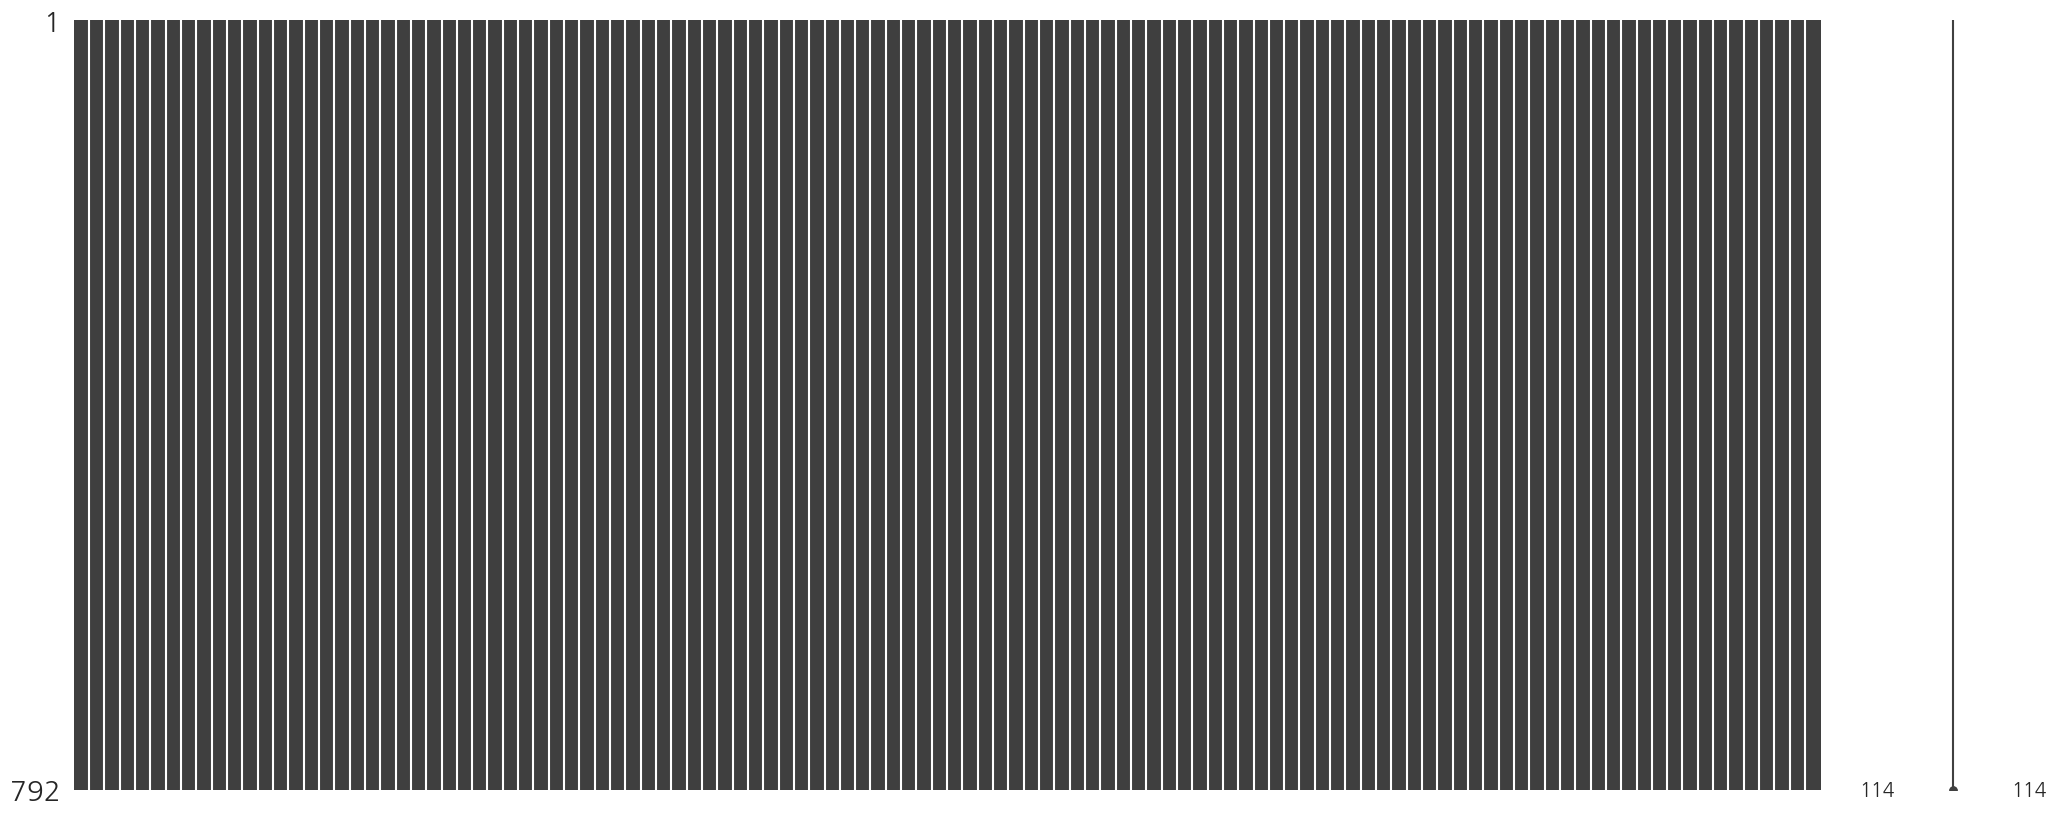

In [53]:
# 결측치 채우기
msno.matrix(df)
plt.show()
## 문자가 아니면
## 문자면

In [54]:
# 시간인덱스 설정
df.set_index('Date', inplace=True)
# Train, Validate, Test 분리
if len(DATE_SPLITS) == 2:
  df_train = df[df.index <= DATE_SPLITS[0]]
  df_validate = df[(df.index > DATE_SPLITS[0]) & (df.index <= DATE_SPLITS[1])]
  df_test = df[(df.index > DATE_SPLITS[1])]
print(df_train.shape, df_validate.shape, df_test.shape)
print('Data Split!')

(594, 113) (72, 113) (126, 113)
Data Split!


- X_col_FUTR (Future Features): 모델이 미래의 정보를 이용하여 예측할 때 사용하는 변수들로, 미래에 대한 정보를 나타낼 수 있는 피처들이 포함

- X_col_HISTR (Historical Features): 과거의 데이터를 기반으로 예측을 진행할 때 사용하는 변수들로, 이미 지나간 과거에 대한 정보를 나타낼 수 있는 피쳐들이 포함

- X_col_STATIC (Static Features): 시간에 따라 변하지 않는 정적인 데이터를 포함하는 변수들로, 제품의 카테고리, 사용자의 고정된 특성(성별, 나이 등)이나 장소에 관련된 정보(도시, 지역 등) 등 모델에 고정된 정보를 제공하여 예측에 영향을 미칠 수 있음

In [56]:
# Y & X 분리
X_colname = [col for col in df_train.columns if col not in [Y_colname]]
display(X_colname)
X_col_FUTR = []
X_col_HISTR = 'auto'
X_col_STATIC_ML = []

['전체주중주말',
 '주운행선',
 '일수',
 '주말수',
 '주중수',
 '공휴일수',
 '명절수',
 '공급차량수',
 '공급좌석합계수',
 '1인당단가',
 '1인당거리',
 '1좌석당단가',
 '좌석회전율',
 '1키로당단가',
 '승차율',
 '관광',
 '일반',
 '대수송',
 '임시',
 '확정',
 '시발역',
 '종착역',
 '시발종착역',
 '열차운행횟수',
 '1열차당승차인원',
 '접종완료자수',
 '확진자수',
 '정부대응정도',
 '코로나진행정도',
 '사망자수',
 '격리된자수',
 '국가이동제한정도',
 '접종시작자수',
 '경제활동인구_원자료',
 '경제활동인구_전기대비증감',
 '경제활동인구_전년동기대비증감',
 '경제활동인구_이동평균(3기간)',
 '실업률_원자료',
 '실업률_전기대비증감',
 '실업률_전년동기대비증감',
 '실업률_이동평균(3기간)',
 '15세이상인구_원자료',
 '15세이상인구_전기대비증감',
 '15세이상인구_전년동기대비증감',
 '15세이상인구_이동평균(3기간)',
 '비경제활동인구_원자료',
 '비경제활동인구_전기대비증감',
 '비경제활동인구_전년동기대비증감',
 '비경제활동인구_이동평균(3기간)',
 '경제활동참가율_원자료',
 '경제활동참가율_전기대비증감',
 '경제활동참가율_전년동기대비증감',
 '경제활동참가율_이동평균(3기간)',
 '고용률_원자료',
 '고용률_전기대비증감',
 '고용률_전년동기대비증감',
 '고용률_이동평균(3기간)',
 '소비자심리지수_원자료',
 '소비자심리지수_전기대비증감',
 '소비자심리지수_전년동기대비증감',
 '소비자심리지수_이동평균(3기간)',
 '총지수_원자료',
 '총지수_전기대비증감',
 '총지수_전년동기대비증감',
 '총지수_이동평균(3기간)',
 '운송장비_원자료',
 '운송장비_전기대비증감',
 '운송장비_전년동기대비증감',
 '운송장비_이동평균(3기간)',
 '개인운송장비 운영_원자료',
 '개인운송장비 운영_전기대비증감',
 '개인운송장비 

In [57]:
# 스케일링
## 시계열 딥러닝 알고리즘 내 포함되어 생략

# Data Understanding

In [58]:
# 자동화 라이브러리 사용해서 빠르게 확인 가능
colname_random = [Y_colname] + [col for col in np.random.choice(df.columns, size=15, replace=False)]
profile = ProfileReport(df[colname_random])
profile

Output hidden; open in https://colab.research.google.com to view.

In [59]:
# 기초통계 확인
print(df.shape)
print()
df.describe(include='all').T

(792, 113)



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
전체주중주말,792,2,주말,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
주운행선,792,3,경부선,264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
일수,792.0,NaN,NaN,NaN,15.219697,2.403583,12.0,13.0,15.5,17.0,19.0
주말수,792.0,NaN,NaN,NaN,6.893939,6.227979,0.0,1.0,8.0,13.0,15.0
주중수,792.0,NaN,NaN,NaN,8.325758,8.381392,0.0,0.0,6.5,17.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
조혼인율(천명당),792.0,NaN,NaN,NaN,4.6,0.69849,3.7,3.8,4.4,5.2,5.9
이혼건수(건),792.0,NaN,NaN,NaN,101648.090909,7644.566955,91151.0,92394.0,106032.0,108684.0,110831.0
조이혼율(천명당),792.0,NaN,NaN,NaN,1.990909,0.150576,1.8,1.8,2.1,2.1,2.2
News_Count,792.0,NaN,NaN,NaN,83.886364,96.861389,0.0,42.0,61.5,85.5,659.0


# Data Process Summary

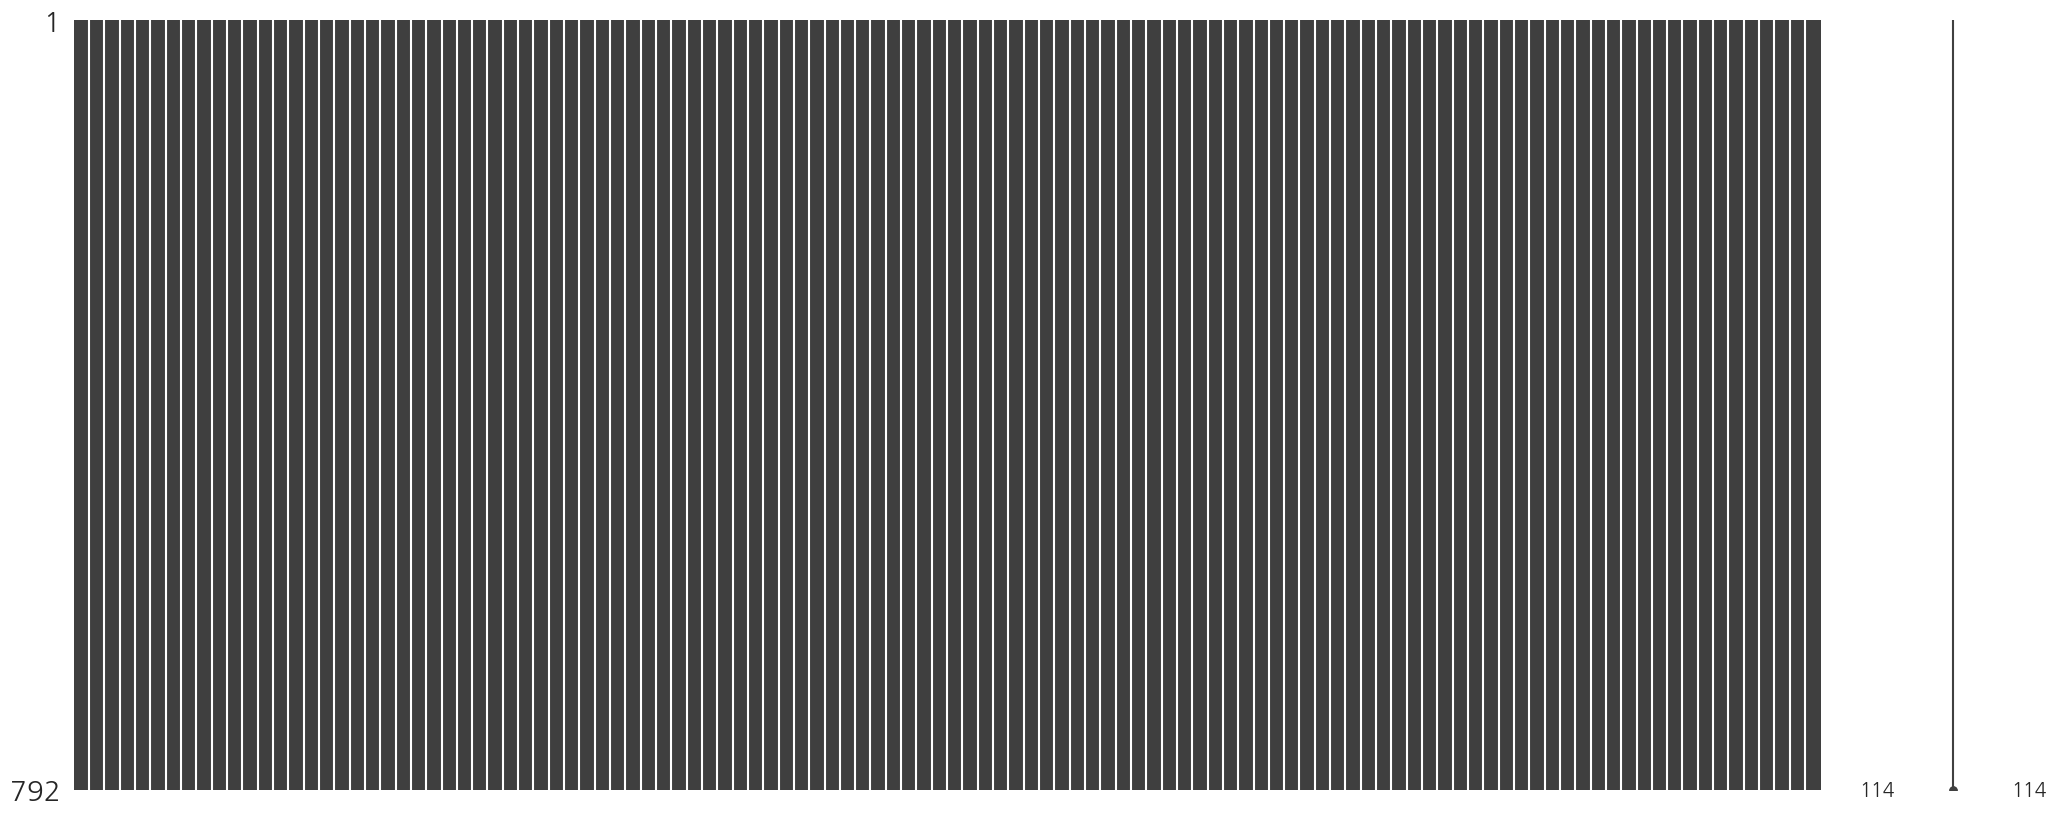

(594, 113) (72, 113) (126, 113)
(792, 113)



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
전체주중주말,792,2,주말,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
주운행선,792,3,경부선,264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
일수,792.0,NaN,NaN,NaN,15.219697,2.403583,12.0,13.0,15.5,17.0,19.0
주말수,792.0,NaN,NaN,NaN,6.893939,6.227979,0.0,1.0,8.0,13.0,15.0
주중수,792.0,NaN,NaN,NaN,8.325758,8.381392,0.0,0.0,6.5,17.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
조혼인율(천명당),792.0,NaN,NaN,NaN,4.6,0.69849,3.7,3.8,4.4,5.2,5.9
이혼건수(건),792.0,NaN,NaN,NaN,101648.090909,7644.566955,91151.0,92394.0,106032.0,108684.0,110831.0
조이혼율(천명당),792.0,NaN,NaN,NaN,1.990909,0.150576,1.8,1.8,2.1,2.1,2.2
News_Count,792.0,NaN,NaN,NaN,83.886364,96.861389,0.0,42.0,61.5,85.5,659.0


In [60]:
# 하이퍼파라미터
## 1) Data Preprocessing
folder_location = os.path.join(os.path.join('.', 'Data'))
Y_colname = '승차인원수'
RANDOM_STATE = 123
DATE_SPLITS = ['2023-03-31', '2024-03-31']
X_col_FUTR = []
X_col_HISTR = 'auto'
X_col_STATIC_ML = []

# 데이터 준비
## 1) 비즈니스 데이터
df = pd.read_csv(os.path.join(folder_location, 'df_KTX_monthsum_example_KK.csv'), encoding='utf-8-sig')
df['Date'] = pd.to_datetime(df['Date'])
## 2) Econ 데이터
df_active = pd.read_excel(os.path.join(folder_location, 'ECON_경제활동인구_KK.xlsx'), sheet_name='데이터', header=7)
df_active['Date'] = pd.to_datetime(df_active['Date'])
df_sentiment = pd.read_excel(os.path.join(folder_location, 'ECON_소비자동향조사(전국, 월, 2008.9~)_KK.xlsx'), sheet_name='데이터', header=7)
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date'])
df_sentiment = df_sentiment.dropna(axis=1)
df_price = pd.read_excel(os.path.join(folder_location, 'ECON_소비자물가지수_KK.xlsx'), sheet_name='데이터', header=6)
df_price['Date'] = pd.to_datetime(df_price['Date'])
## 3) Kosis 데이터
df_traffic = pd.read_csv(os.path.join(folder_location, 'KOSIS_내국인출국교통수단별_KK.csv'), encoding='cp949', header=2)
df_traffic['Date'] = pd.to_datetime(df_traffic['Date'])
df_traffic['내국인출입국_공항'] = df_traffic[[col for col in df_traffic.columns if col.split('_')[0] == '공항']].sum(axis=1).values
df_traffic['내국인출입국_항구'] = df_traffic[[col for col in df_traffic.columns if col.split('_')[0] == '항구']].sum(axis=1).values
df_traffic.drop(columns=[col for col in df_traffic.columns if col.split('_')[0] in ['공항', '항구']], inplace=True)
df_entry = pd.read_csv(os.path.join(folder_location, 'KOSIS_외래객_입국목적별_국적별_KK.csv'), encoding='cp949', header=1)
df_entry['Date'] = pd.to_datetime(df_entry['Date'])
df_population = pd.read_csv(os.path.join(folder_location, 'KOSIS_인구동태건수_및_동태율_추이_출생_사망_혼인_이혼__KK.csv'), encoding='cp949', header=0)
df_population['Date'] = pd.to_datetime(df_population['Date'], format='%Y', errors='coerce')
df_population = df_population[[col for col in df_population.columns if col not in ['영아사망률(출생아 천명당)', '기대수명(출생시 기대여명)',
                                                                                   '기대수명(출생시 기대여명) - 남', '기대수명(출생시 기대여명) - 여']]]
## 뉴스 데이터
df_news = pd.read_excel(os.path.join(folder_location, 'NewsResult_20150101-20250331_KTX코레일.xlsx'), header=0)
df_news.rename(columns={'일자':'Date'}, inplace=True)
df_news['Date'] = pd.to_datetime(df_news['Date'], format='%Y%m%d')
df_news = df_news[['Date', '언론사', '통합 분류1', '제목', '본문']]
df_news = df_news.sort_values(by='Date', ascending=True).reset_index().iloc[:,1:]
## 4) 뉴스 트래픽 추출
df_news['Date_Group'] = df_news['Date'].apply(lambda x: str(x)[:7])
df_news_count = df_news.groupby('Date_Group')['제목'].count().reset_index()
df_news_count.rename(columns={'제목':'News_Count'}, inplace=True)
df_news_count['Date'] = pd.to_datetime(df_news_count.Date_Group, format='%Y-%m', errors='coerce')
df_news_count = df_news_count[['Date', 'News_Count']]
## 5) 감성 추출 데이터 정리
df_news_sentiment = pd.read_csv(os.path.join('.', 'Data', 'NewsResult_20150101-20250331_KTX코레일_Sentiment.csv'),
                                encoding='utf-8-sig')
## 일 -> 월 감성 집계
df_news_sentiment = pd.concat([df_news.Date, df_news.Date_Group, df_news_sentiment['Sentiment']], axis=1)
df_news_sentiment = df_news_sentiment.groupby('Date_Group')['Sentiment'].sum().reset_index()
df_news_sentiment['Date_Group'] = pd.to_datetime(df_news_sentiment.Date_Group, format='%Y-%m')
df_news_sentiment.rename(columns={'Date_Group':'Date'}, inplace=True)

# 데이터 결합
df = pd.merge(df, df_active, on='Date', how='left').fillna(0)
df = pd.merge(df, df_sentiment, on='Date', how='left').fillna(0)
df = pd.merge(df, df_price, on='Date', how='left').fillna(0)
df = pd.merge(df, df_traffic, on='Date', how='left').fillna(0)
df = pd.merge(df, df_entry, on='Date', how='left').fillna(0)
df = pd.merge(df, df_population, on='Date', how='left').fillna(method='ffill')
df = pd.merge(df, df_news_count, on='Date', how='left').fillna(0)
df = pd.merge(df, df_news_sentiment, on='Date', how='left').fillna(0)
## 변수명 좌우공백 제거
df.columns = [col.strip() for col in df.columns]

# 데이터 전처리
# 1) 불필요 변수 삭제
## 결측치의 비율이 50% 넘는 변수 삭제
## 변수의 값 종류가 1개인 변수 삭제
## 분석과 무관한 변수 삭제

# 2) 결측치 채우기
msno.matrix(df)
plt.show()

# 3) 시간인덱스 설정
df.set_index('Date', inplace=True)

# 4) Train, Validate, Test 분리
if len(DATE_SPLITS) == 2:
  df_train = df[df.index <= DATE_SPLITS[0]]
  df_validate = df[(df.index > DATE_SPLITS[0]) & (df.index <= DATE_SPLITS[1])]
  df_test = df[(df.index > DATE_SPLITS[1])]
print(df_train.shape, df_validate.shape, df_test.shape)

# 5) Y & X 분리
X_colname = [col for col in df_train.columns if col not in [Y_colname]]

# 6) 스케일링
## 시계열 딥러닝 알고리즘 내 포함되어 생략

# 데이터 이해
print(df.shape)
print()
display(df.describe(include='all').T)
